# Convolucion de una imagen blanco y negro
Iniciamos importando las librerias que seran necesarias en nuestro codigo:

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

Luego, seleccionamos la imagen imagen que queramos y las llamamos dentro del codigo(que veran acontinuacion) para asi imprimirla dentro del codigo mismo. Esto es posible gracias a las librerias `scikit-image` y `matplotlib.pyplot`.

<Figure size 432x288 with 0 Axes>

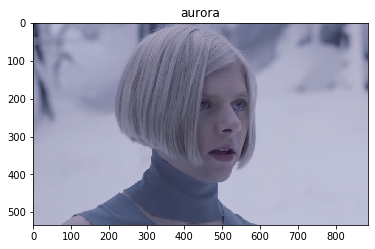

<Figure size 432x288 with 0 Axes>

In [2]:
aurora=io.imread("aurora.png") #Lectura de imagen
plt.imshow(aurora)
plt.title("aurora")
plt.figure()

Al ver la imagen podemos decir con total seguridad que es muldidimensional, pero para asegurarnos de esta hipotesis llamamos al comando `np.shape()`.

In [3]:
np.shape(aurora)

(534, 886, 3)

Efectivamente, notamos que nuestra imagen es multidimensional. De seguro se preguntaran para que nos sirve este dato, pues bien, en este momento lo que haremos sera justamente convertirlo a una imagen compuesta por solo 2 dimensiones de pixeles. Esto lo haremos definiendo 3 variables y creando un nuevo array bidimensional que contenga a la imagen original de la siguiente forma:

In [4]:
h,w,c=aurora.shape 

aurora_gris=np.zeros((h,w)) 
for i in range(h):
    for j in range(w):
        aurora_gris[i,j] = (aurora[i,j,0]+aurora[i,j,1]+aurora[i,j,2])/3
        
io.imsave('aurora_gris.png', aurora_gris)

/home/pierre/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  
Lossy conversion from float64 to uint8. Range [0.0, 85.0]. Convert image to uint8 prior to saving to suppress this warning.


Como podran notar, a esta nueva imagen creada y ya guardada con el comando `io.imsave()` le hemos dado el nombre de "aurora_gris" y es con la que trabajaremos en el proceso de convolucion. 

Sabemos que "aurora_gris" es una imagen compuesta por 2 dimensiones, y para asegurarnos de esto, nuevamente usamos el comando `np.shape()` y luego la  visualizamos con el comando `plt.imshow()`.

(534, 886)

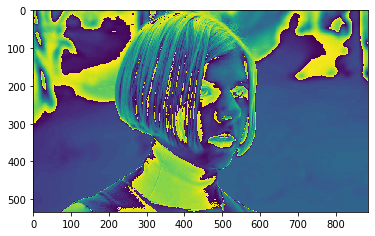

In [5]:
plt.imshow(aurora_gris)
np.shape(aurora_gris)

En efecto, hemos creado una imagen bidimensional a partir de una imagen multidimensional, sin embargo, el resultado que obtenemos(como pudieron ver con anterioridad) es algo diferente del que probablemente ustedes esperaban, esto se debe justamente a que hemos "forzado" el convertir una imagen multidimensional en una bidimensional.

En estos momentos, lo que haremos sera definir nuestra funcion de `convolucion` de la siguiente forma:

In [6]:
def convolution(image, mask):
    h, w = image.shape
    aux = np.zeros((h-2,w-2))
    initial_row = 0
    final_row = 3
    initial_column = 0
    final_column = 3
    slice_matrix = image[initial_row:final_row, initial_column:final_column]
    
    for i in range(0,h-2):
        for j in range(0,w-2):
            aux[i][j] = np.sum(slice_matrix * mask)
            initial_column+=1
            final_column+=1
            slice_matrix = image[initial_row:final_row, initial_column:final_column]
        initial_column = 0
        final_column = 3
        initial_row+=1
        final_row+=1
        slice_matrix = image[initial_row:final_row, initial_column:final_column]
    return aux

Ahora creamos nuestra matriz `Kernel`, con la que se hara la transformacion de imagen que en este caso sera la de `desenfoque`.

In [7]:
Kernel= [[1/16, 2/16, 1/16],[2/16, 4/16, 2/16],[1/16, 2/16, 1/16]]

Lo que se hara a continuacion sera hacer el metodo "padding" para poder realizar la convolucion.

In [8]:
aurora_pad=np.pad(aurora_gris, [(1, 1), (1, 1)], mode='constant', constant_values=0)

Creamos una nueva matriz usando la funcion de `convolucion` llamada `Aurora`.

In [9]:
Aurora=convolution(aurora_pad,Kernel)

Para finalizar, guardamos la imagen y la visualizamos(con los comandos anteriormente usados).

Lossy conversion from float64 to uint8. Range [0.0, 84.81250000000001]. Convert image to uint8 prior to saving to suppress this warning.


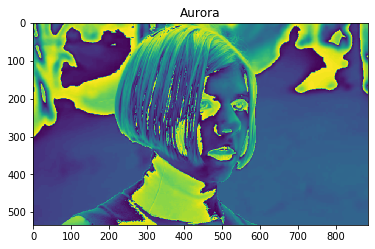

<Figure size 432x288 with 0 Axes>

In [11]:
plt.imshow(Aurora)
plt.title("Aurora")
plt.figure()
io.imsave("Aaurora.png", Aurora)

Ahora, analizando detenidamente la imagen actual y contrastandola con la anterior, podemos observar el teue desenfoque que ha causado la convolucion.